##**1.All the Lifecycle In A Data Science Projects**

    Data Analysis
    Feature Engineering
    Feature Selection
    Model Building
    Model Deployment



In [2]:
##Importing Neccesaary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train=pd.read_csv('train_v9rqX0R.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.shape   #Size of training set

(8523, 12)

In [6]:
test=pd.read_csv('test_AbJTz2l.csv')

In [7]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:

train['source']='train'
test['source']='test'
dataset = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, dataset.shape)

(8523, 13) (5681, 12) (14204, 13)


/home/stellapps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


#**1.In Data Analysis We will Analyze To Find out the below stuff**

    Missing Values
    All The Numerical Variables
    Distribution of the Numerical Variables
    Categorical Variables
    Cardinality of Categorical Variables
    Outliers
    Relationship between independent and dependent feature(SalePrice)



In [9]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [10]:
dataset.apply(lambda x:len(x.unique()))  #Unique Values

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

# Missing Values

In [11]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

Item_Outlet_Sales 0.4  % missing values
Item_Weight 0.1717  % missing values
Outlet_Size 0.2827  % missing values


We have mssing values ,We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

# Numerical Features

In [13]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()


Number of numerical variables:  5


,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,249.8092,3735.1380,0.016047,9.30,1999
1,48.2692,443.4228,0.019278,5.92,2009
2,141.6180,2097.2700,0.016760,17.50,1999
3,182.0950,732.3800,0.000000,19.20,1998
4,53.8614,994.7052,0.000000,8.93,1987


In [14]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['Outlet_Establishment_Year']

In [15]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

Outlet_Establishment_Year [1999 2009 1998 1987 1985 2002 2007 1997 2004]


Text(0.5, 1.0, 'Item_Outlet_Sales vs YearSold')

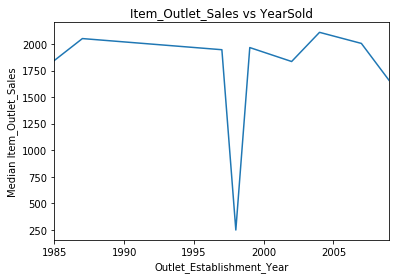

In [16]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year and target colums
dataset.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot()
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Median Item_Outlet_Sales')
plt.title("Item_Outlet_Sales vs YearSold")

In [18]:
#Continous Feature
continuous_feature=[feature for feature in numerical_features ]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


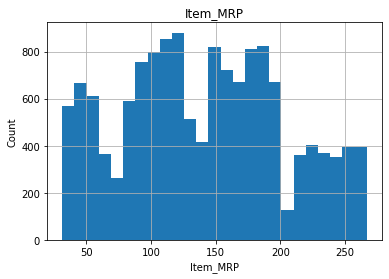

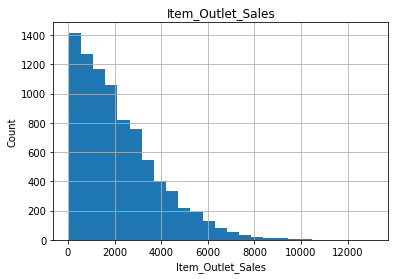

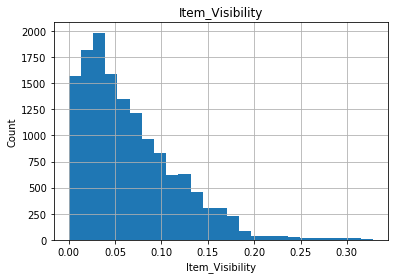

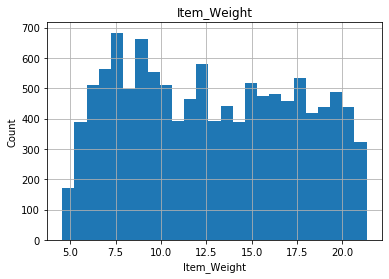

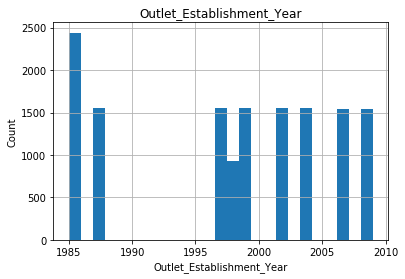

In [19]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

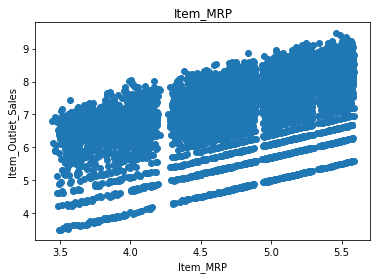

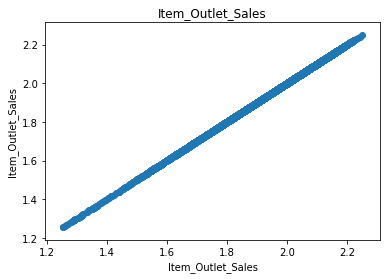

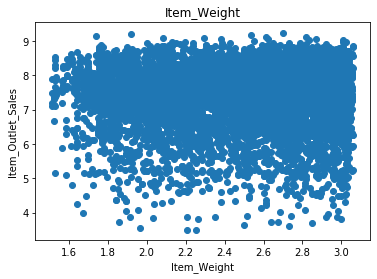

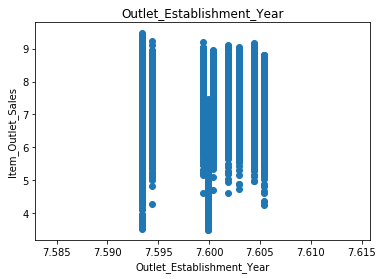

In [20]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Item_Outlet_Sales']=np.log(data['Item_Outlet_Sales'])
        plt.scatter(data[feature],data['Item_Outlet_Sales'])
        plt.xlabel(feature)
        plt.ylabel('Item_Outlet_Sales')
        plt.title(feature)
        plt.show()

# Outlier

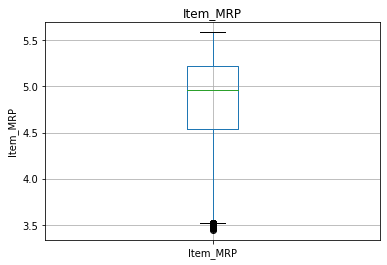

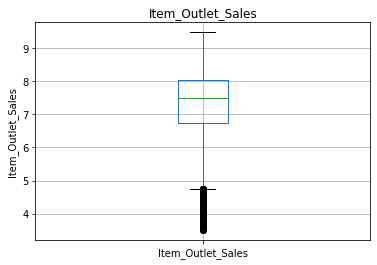

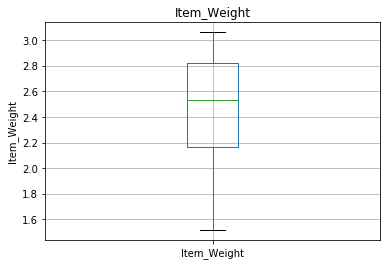

In [34]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Categorical features

In [35]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['Item_Fat_Content',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'source']

In [36]:
dataset[categorical_features].head()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,Dairy,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,Soft Drinks,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,Meat,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,Fruits and Vegetables,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,Household,OUT013,Tier 3,High,Supermarket Type1,train


In [37]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Item_Fat_Content and number of categories are 5
The feature is Item_Identifier and number of categories are 1559
The feature is Item_Type and number of categories are 16
The feature is Outlet_Identifier and number of categories are 10
The feature is Outlet_Location_Type and number of categories are 3
The feature is Outlet_Size and number of categories are 4
The feature is Outlet_Type and number of categories are 4
The feature is source and number of categories are 2


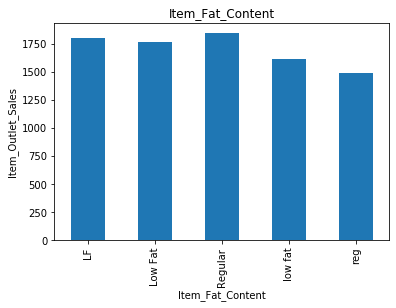

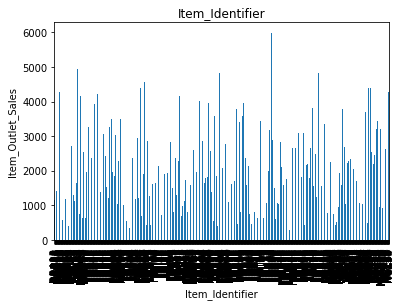

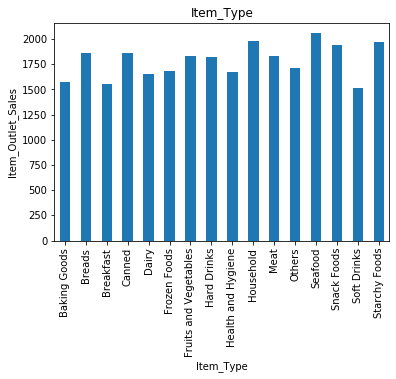

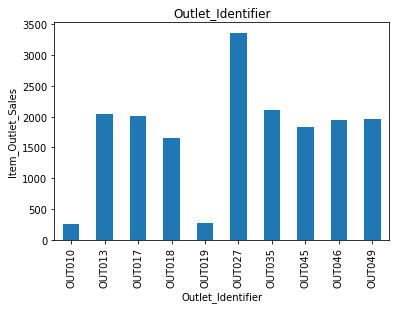

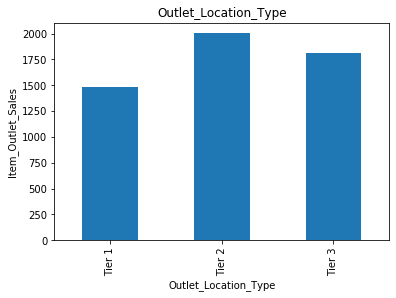

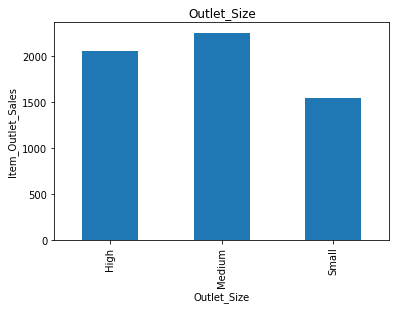

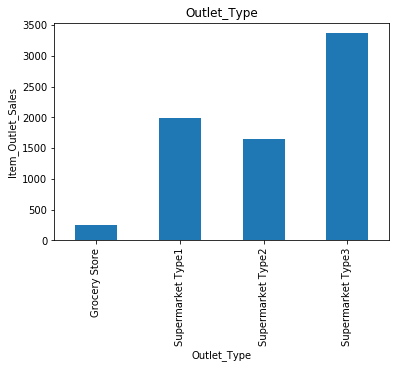

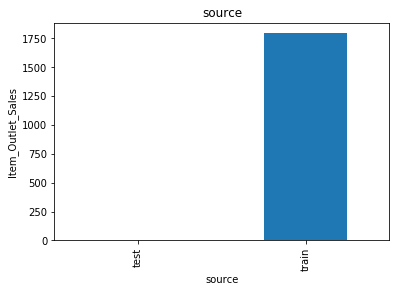

In [43]:
## Find out the relationship between categorical variable and dependent feature SalesPrice
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Item_Outlet_Sales')
    plt.title(feature)
    plt.show()

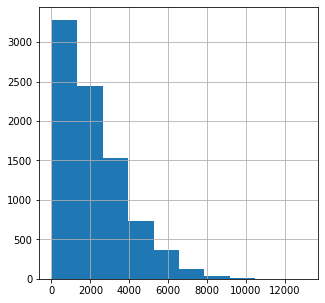

In [45]:
#Distribution of Traget Variables
dataset['Item_Outlet_Sales'].hist(figsize=(5,5))

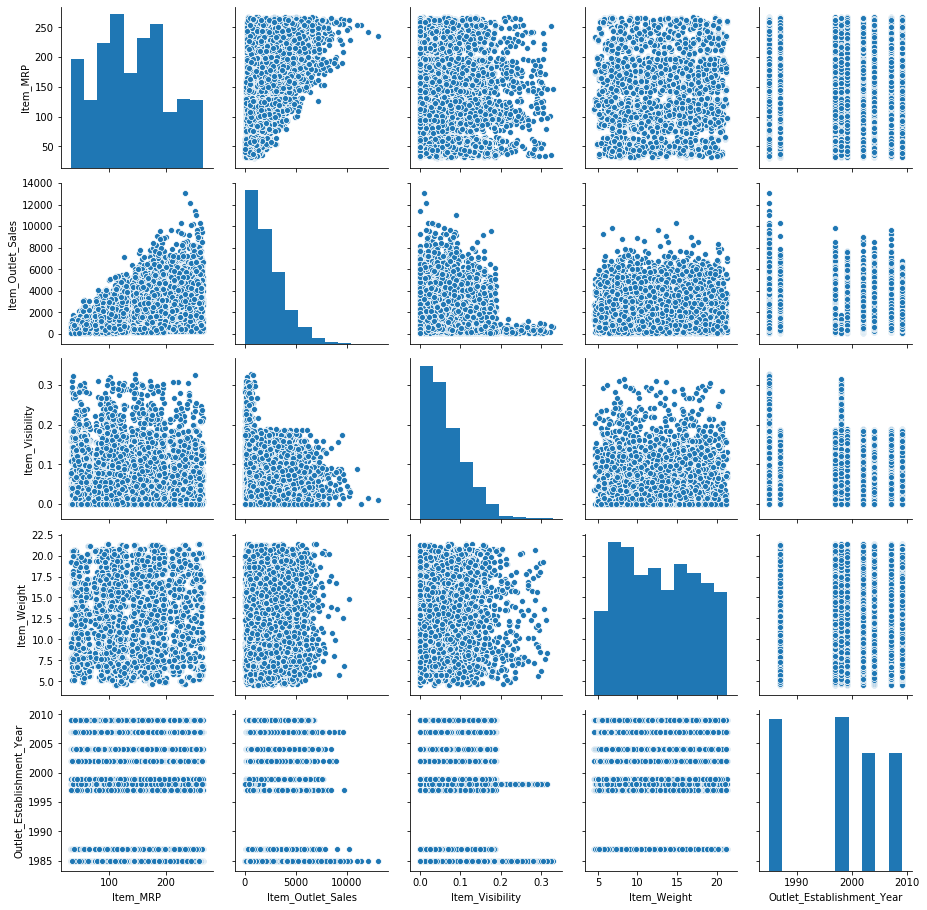

In [46]:
#Distribution of features
sns.pairplot(dataset)

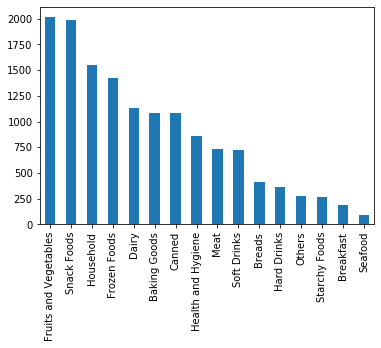

In [48]:
dataset['Item_Type'].value_counts().plot(kind='bar')

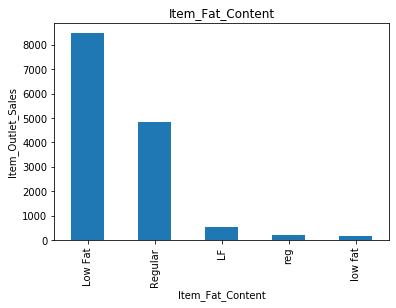

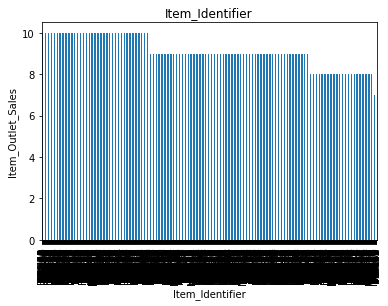

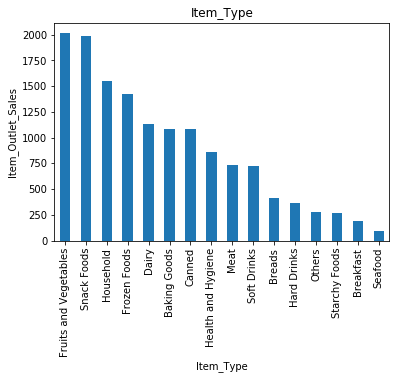

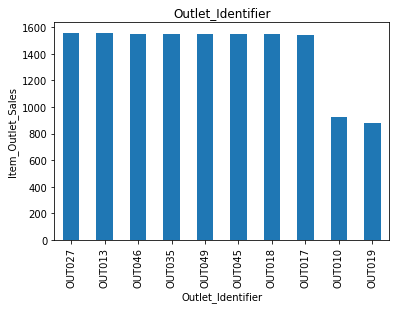

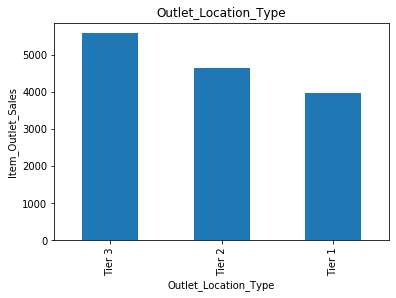

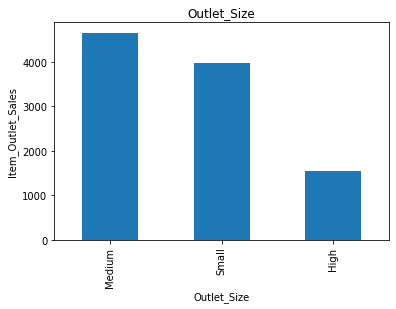

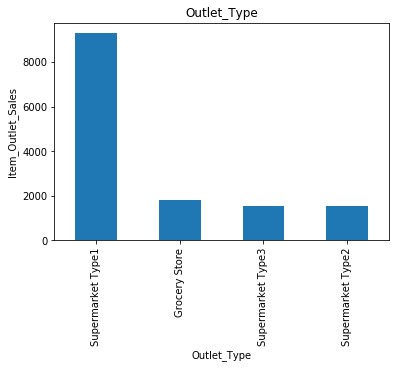

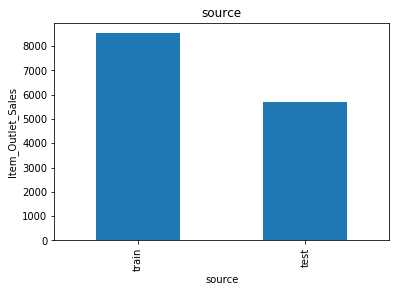

In [50]:
## Find out the relationship between categorical variable and dependent feature SalesPrice
for feature in categorical_features:
    data=dataset.copy()
    data[feature].value_counts().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Item_Outlet_Sales')
    plt.title(feature)
    plt.show()